## Быстрая гистограмма

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from typing import List, Tuple, Union
def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    array.sort()
    labels = np.arange(array[0], array[-1], (array[-1] - array[0]) / bins)
    regions = [0] * bins
    r = 0
    for b in range(bins):
        next_bin_label = labels[b + 1] if b + 1 < bins else labels[b] + 1000
        while r < len(array) and array[r] < next_bin_label:
            regions[b] += 1
            r += 1

    return regions, labels

In [3]:
import timeit

bins = 15
data = [random.random() for _ in range(60)]

def check_time(f, *args):
    return timeit.timeit(lambda: f(*args), number=1)

#### Проверим время

154.6498230203091

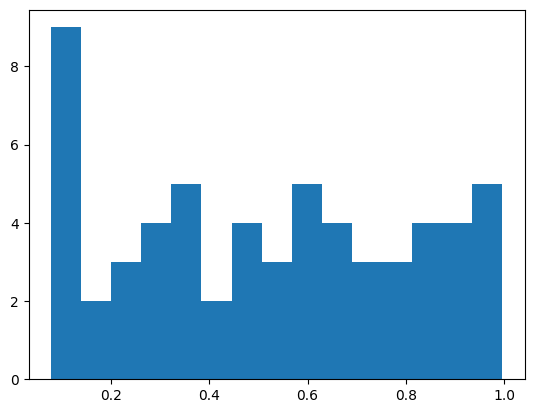

In [4]:
std = check_time(plt.hist, data, bins)
fast = check_time(fast_hist, data, bins)
std / fast

#### Построим графики

(array([9., 2., 3., 4., 5., 2., 4., 3., 5., 4., 3., 3., 4., 4., 5.]),
 array([0.07795273, 0.1391486 , 0.20034447, 0.26154034, 0.32273621,
        0.38393208, 0.44512795, 0.50632382, 0.56751969, 0.62871556,
        0.68991143, 0.7511073 , 0.81230317, 0.87349904, 0.93469491,
        0.99589078]),
 <BarContainer object of 15 artists>)

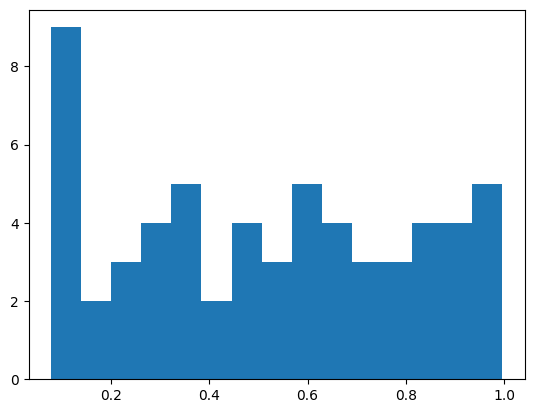

In [5]:
plt.hist(data, bins)

([9, 2, 3, 4, 5, 2, 4, 3, 5, 4, 3, 3, 4, 4, 5], array([0.07795273, 0.1391486 , 0.20034447, 0.26154034, 0.32273621,
       0.38393208, 0.44512795, 0.50632382, 0.56751969, 0.62871556,
       0.68991143, 0.7511073 , 0.81230317, 0.87349904, 0.93469491]))


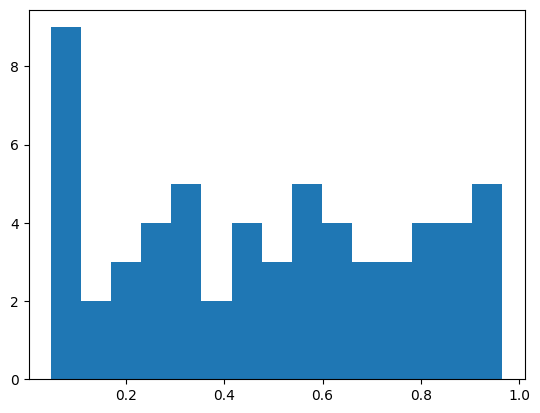

In [6]:
width = (data[-1] - data[0]) / bins
height, labels = fast_hist(data, bins)
plt.bar(labels, height, width)
print(fast_hist(data, bins))
plt.show()